In [2]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd


In [3]:
URL = "https://www.airlinequality.com/airline-reviews/british-airways" 
r = requests.get(URL)

In [4]:
pages = 10
page_size = 100


In [5]:
reviews = []


In [6]:
for i in range(1, pages + 1):

    print(f"Scraping page {i}")
  
    url = f"{URL}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
   
    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [7]:
df = pd.DataFrame()
df["reviews"] = reviews


In [8]:
df.head()

,reviews
0,Not Verified | Singapore to Heathrow. Busine...
1,Not Verified | I reported my damaged/ruined ...
2,"Not Verified | On March 1st, I flew from Ber..."
3,Not Verified | The WORST customer experience! ...
4,Not Verified | Had to cancel my flight month...


In [9]:
df.tail()

,reviews
995,Not Verified | London to Seattle. My husband ...
996,✅ Trip Verified | Johannesburg to London. I b...
997,✅ Trip Verified | London to Milan. Evening ou...
998,✅ Trip Verified | The connecting flight to Jo...
999,✅ Trip Verified | London Heathrow to Los Angel...


In [10]:
df.to_csv("BA_reviews.csv")

In [11]:
data=pd.read_csv("BA_reviews.csv")

In [12]:
data.head()

,Unnamed: 0,reviews
0,0,Not Verified | Singapore to Heathrow. Busine...
1,1,Not Verified | I reported my damaged/ruined ...
2,2,"Not Verified | On March 1st, I flew from Ber..."
3,3,Not Verified | The WORST customer experience! ...
4,4,Not Verified | Had to cancel my flight month...


In [13]:
data.tail()

,Unnamed: 0,reviews
995,995,Not Verified | London to Seattle. My husband ...
996,996,✅ Trip Verified | Johannesburg to London. I b...
997,997,✅ Trip Verified | London to Milan. Evening ou...
998,998,✅ Trip Verified | The connecting flight to Jo...
999,999,✅ Trip Verified | London Heathrow to Los Angel...


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [15]:
data.reset_index(drop=True, inplace=True)

In [16]:
data.isnull().sum()


Unnamed: 0    0
reviews       0
dtype: int64

There are no null values/ missing values in out dataset. 
The dataset contains 1000 unique entries.

# Data Cleaning
Removing (✅ Trip Verified | and Not Verified | ) to clean the data. 

Removing any leading or trailing spaces. 

Turning the review string to all lower case.

In [18]:
data['reviews'] = data['reviews'].str.strip()

In [20]:
data['reviews']=data['reviews'].str.lstrip('✅ Trip Verified |')
data['reviews']=data['reviews'].str.lstrip('Not Verified |')

In [21]:
data['reviews']= data['reviews'].str.lower()
print(data)

     Unnamed: 0                                            reviews
0             0  singapore to heathrow. business class on an a3...
1             1  i reported my damaged/ruined suitcase 5 weeks ...
2             2     on march 1st, i flew from berlin to são pau...
3             3  the worst customer experience! british airways...
4             4     had to cancel my flight months in advance d...
..          ...                                                ...
995         995  london to seattle. my husband and i have used ...
996         996  johannesburg to london. i booked a seat withou...
997         997  london to milan. evening outbound flight with ...
998         998  he connecting flight to johannesburg was on an...
999         999  london heathrow to los angeles. very nice expe...

[1000 rows x 2 columns]


In [29]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import string
import nltk

# Removing punctutaions

In [30]:
data['reviews'] = data['reviews'].str.replace(f"[{string.punctuation}]", "", regex=True)


In [31]:
print(data)

     Unnamed: 0                                            reviews
0             0  singapore to heathrow business class on an a38...
1             1  i reported my damagedruined suitcase 5 weeks a...
2             2     on march 1st i flew from berlin to são paul...
3             3  the worst customer experience british airways ...
4             4     had to cancel my flight months in advance d...
..          ...                                                ...
995         995  london to seattle my husband and i have used t...
996         996  johannesburg to london i booked a seat without...
997         997  london to milan evening outbound flight with s...
998         998  he connecting flight to johannesburg was on an...
999         999  london heathrow to los angeles very nice exper...

[1000 rows x 2 columns]


# Tokenizing the review column

In [33]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SNEHAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
print(data.iloc[1,1])
data['reviews'] = data.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(data.iloc[0,1])

i reported my damagedruined suitcase 5 weeks ago and im still awaiting a reply ill think twice about booking with ba again as the customer service is shocking to say the least ive followed up with british airways with at least 3 emails per week requesting an update but with no joy so far
['singapore', 'to', 'heathrow', 'business', 'class', 'on', 'an', 'a380800', 'is', 'a', 'premium', 'economy', 'plus', 'experience', 'from', 'the', 'economy', 'class', 'sized', 'toilets', 'to', 'the', 'badly', 'designed', 'coffin', 'shaped', 'business', 'class', 'pods', 'the', 'experience', 'is', 'a', 'substandard', 'business', 'class', 'experience', 'business', 'class', 'pod', '’', 's', 'storage', 'is', 'a', 'small', 'drawer', 'at', 'the', 'foot', 'of', 'the', 'pod', 'the', '‘', 'privacy', '’', 'screens', 'are', 'opaque', 'plastic', 'sheets', 'so', 'you', 'are', 'kept', 'awake', 'by', 'your', 'neighbour', 'as', 'their', 'screen', 'lights', 'up', 'your', 'pod', 'when', 'the', 'seat', 'is', 'made', 'into'

# Removing stopwords

In [36]:
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SNEHAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [37]:
data['reviews'] = data['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(data)

     Unnamed: 0                                            reviews
0             0  singapore heathrow business class a380800 prem...
1             1  reported damagedruined suitcase 5 weeks ago im...
2             2  march 1st flew berlin são paulo ba encountered...
3             3  worst customer experience british airways ba e...
4             4  cancel flight months advance due change schedu...
..          ...                                                ...
995         995  london seattle husband used service number yea...
996         996  johannesburg london booked seat without luggag...
997         997  london milan evening outbound flight board spa...
998         998  connecting flight johannesburg older 737400 pr...
999         999  london heathrow los angeles nice experience re...

[1000 rows x 2 columns]


In [40]:
pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/626.3 kB 682.7 kB/s eta 0:00:01
   ----- --------------------------------- 81.9/626.3 kB 762.6 kB/s eta 0:00:01
   ------ ------------------------------- 102.4/626.3 kB 980.4 kB/s eta 0:00:01
   ----------- -------------------------- 184.3/626.3 kB 930.9 kB/s eta 0:00:01
   -------------- ----------------------- 235.5/626.3 kB 962.7 kB/s eta 0:00:01
   ------------------ --------------------- 297.0/626.3 kB 1.0 MB/s eta 0:00:01
   ---------------------- ----------------- 358.4/626.3 kB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 460.8/626.3 kB 1.2 MB/s eta 0:00:01
   -------------------------------- ------- 512.0/626.3 kB 1.1 MB/s eta 0:00:01
 

In [41]:
from textblob import TextBlob

In [44]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    

    
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
        
    
data['polarity'] = data['reviews'].apply(polarity_calc)


data['tag'] = data['polarity'].apply(tag_cal)


print(data)

     Unnamed: 0                                            reviews  polarity  \
0             0  singapore heathrow business class a380800 prem... -0.298810   
1             1  reported damagedruined suitcase 5 weeks ago im... -0.171429   
2             2  march 1st flew berlin são paulo ba encountered... -0.042143   
3             3  worst customer experience british airways ba e...  0.009028   
4             4  cancel flight months advance due change schedu...  0.135000   
..          ...                                                ...       ...   
995         995  london seattle husband used service number yea...  0.169231   
996         996  johannesburg london booked seat without luggag... -0.050000   
997         997  london milan evening outbound flight board spa...  0.160317   
998         998  connecting flight johannesburg older 737400 pr...  0.244124   
999         999  london heathrow los angeles nice experience re...  0.611111   

          tag  
0    Negative  
1    Ne

# The percentage of various types of tags.

In [45]:
(data.groupby('tag').size()/data['tag'].count())*100

tag
Negative    35.4
Neutral      1.6
Positive    63.0
dtype: float64

# Visualizing the results

In [49]:
pip install wordcloud matplotlib


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 640.0 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 762.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 726.2 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [50]:
import matplotlib.pyplot as plt

In [51]:
from wordcloud import WordCloud

In [59]:
import seaborn as sns

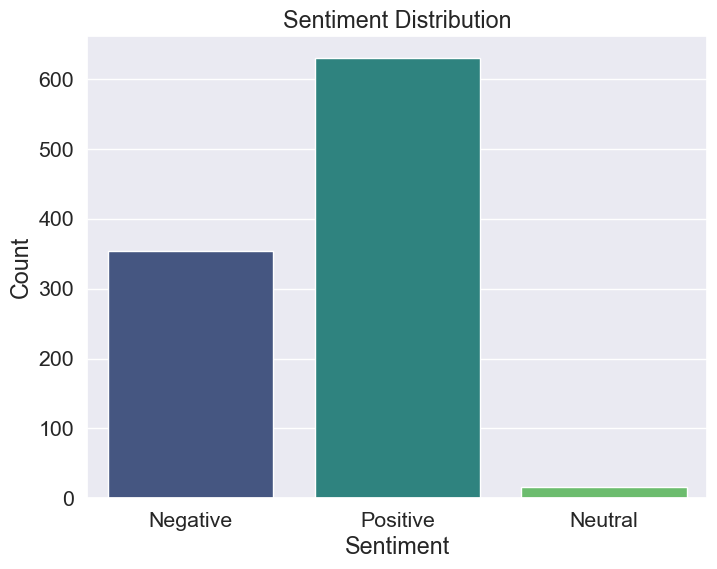

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(x='tag', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


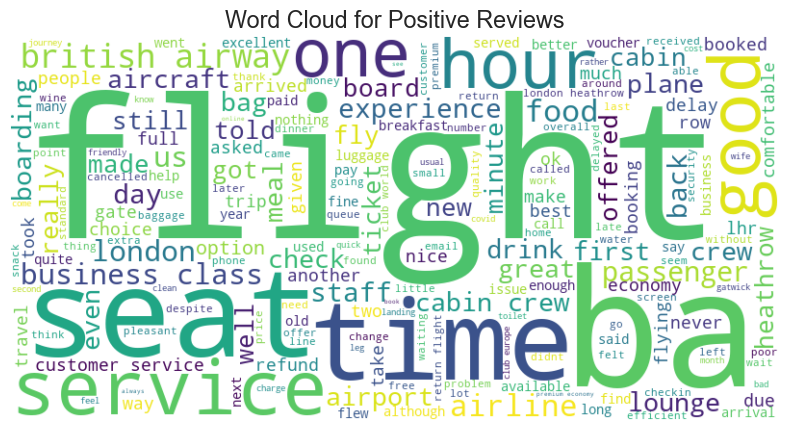

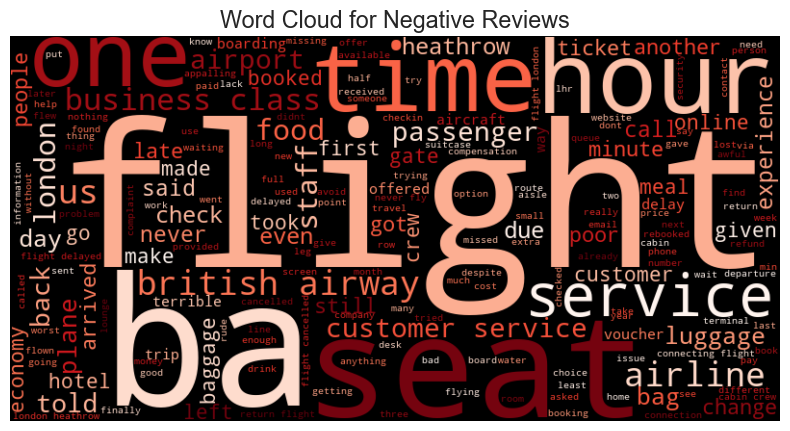

In [66]:
positive_reviews = ' '.join(data[data['tag'] == 'Positive']['reviews'])
negative_reviews = ' '.join(data[data['tag'] == 'Negative']['reviews'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [69]:
from collections import Counter
positive_words = ' '.join(data[data['tag'] == 'Positive']['reviews']).split()
negative_words = ' '.join(data[data['tag'] == 'Negative']['reviews']).split()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

In [70]:
positive_word_df = pd.DataFrame(positive_word_counts.most_common(10), columns=['word', 'count'])
negative_word_df = pd.DataFrame(negative_word_counts.most_common(10), columns=['word', 'count'])


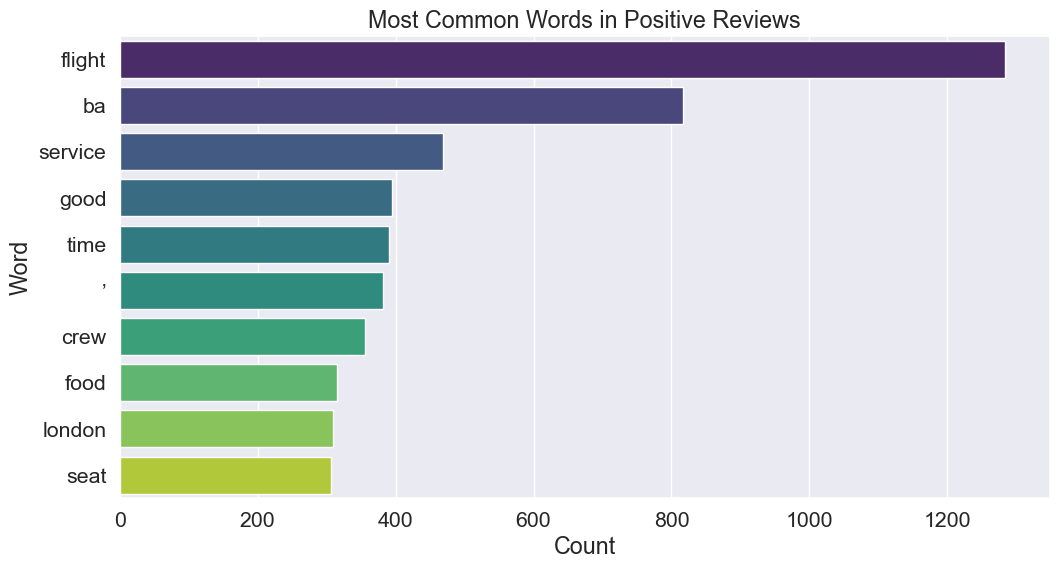

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=positive_word_df, palette='viridis')
plt.title('Most Common Words in Positive Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

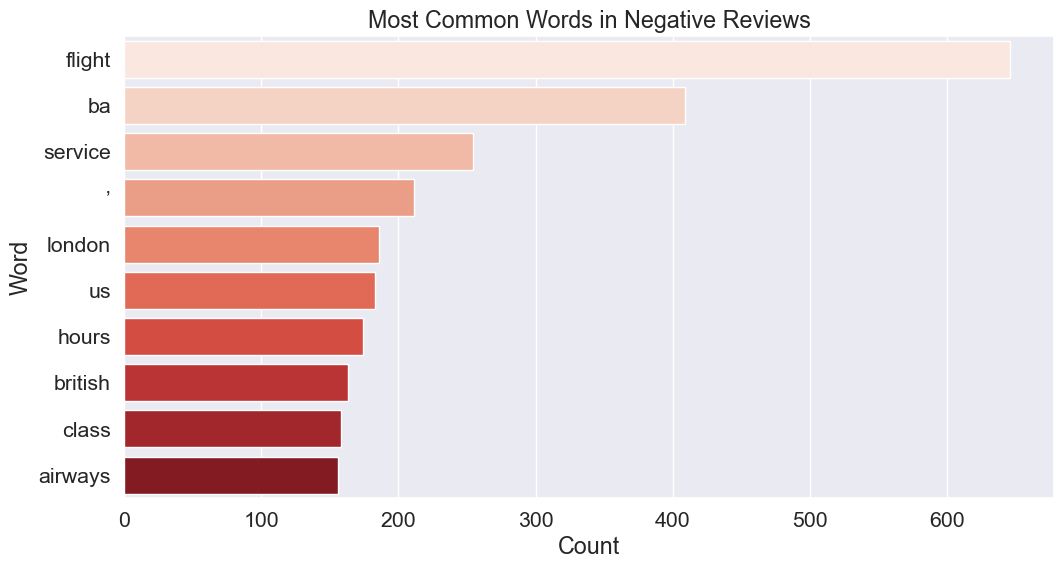

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=negative_word_df, palette='Reds')
plt.title('Most Common Words in Negative Reviews')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [73]:
review_counts = data['tag'].value_counts()
print(review_counts)


Positive    630
Negative    354
Neutral      16
Name: tag, dtype: int64
